# Spatial Variation in Airbnb Prices in London: Implications and Recommendations for Policymakers

## CASA0013: Foundations of Spatial Data Science

### Student Id: 21188261

#### Data & Notebook: https://github.com/xiaohansu59/Airbnb

In [1]:
from pathlib import Path
import requests
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import altair as alt
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
import os
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/xiaohansu59/Airbnb/main/data/listings.csv', 
                 parse_dates=['last_review'])

In [3]:
gdf = gpd.read_file('https://raw.githubusercontent.com/xiaohansu59/Airbnb/main/data/neighbourhoods.geojson')

In [4]:
df.shape

(69351, 18)

In [5]:
cols = ['neighbourhood', 'geometry']
gdf = gdf.loc[:, cols]

In [6]:
df['mean_price'] = df.groupby('neighbourhood')['price'].transform('mean')
test = gdf.merge(df, how='inner', on='neighbourhood')
test_reduced = test[['geometry','neighbourhood','mean_price']].drop_duplicates()

In [7]:
test_reduced.head()

,geometry,neighbourhood,mean_price
0,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...",Kingston upon Thames,198.673235
609,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51...",Croydon,82.561914
1675,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2...",Bromley,112.742424
2269,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51...",Hounslow,160.189239
3347,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51...",Ealing,114.104314


In [8]:
number = df['neighbourhood'].value_counts().sort_values()
nbh_nb = {'neighbourhood':number.index,'number':number.values}
nbh_nb_df = pd.DataFrame(nbh_nb)
merge = pd.merge(test_reduced.iloc[:,0:3],nbh_nb_df,on='neighbourhood',how='inner')

In [9]:
merge.head()

,geometry,neighbourhood,mean_price,number
0,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...",Kingston upon Thames,198.673235,609
1,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51...",Croydon,82.561914,1066
2,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2...",Bromley,112.742424,594
3,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51...",Hounslow,160.189239,1078
4,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51...",Ealing,114.104314,1553


In [10]:
merge_sorted = merge.sort_values('number', ascending=False)
merge_sorted

,geometry,neighbourhood,mean_price,number
25,"MULTIPOLYGON (((-0.15000 51.48548, -0.15009 51...",Westminster,296.950148,7763
27,"MULTIPOLYGON (((-0.07938 51.50784, -0.07934 51...",Tower Hamlets,126.876139,5595
29,"MULTIPOLYGON (((-0.09767 51.57365, -0.09756 51...",Hackney,125.466331,5168
26,"MULTIPOLYGON (((-0.14242 51.56912, -0.14250 51...",Camden,193.725303,4707
23,"MULTIPOLYGON (((-0.18388 51.47742, -0.18403 51...",Kensington and Chelsea,302.882047,4612
15,"MULTIPOLYGON (((-0.10892 51.50844, -0.10889 51...",Southwark,195.298387,3968
28,"MULTIPOLYGON (((-0.13839 51.55686, -0.13851 51...",Islington,148.832718,3790
14,"MULTIPOLYGON (((-0.12846 51.48505, -0.12843 51...",Lambeth,130.569508,3719
21,"MULTIPOLYGON (((-0.22343 51.47152, -0.22327 51...",Wandsworth,176.366254,3473
22,"MULTIPOLYGON (((-0.24456 51.48870, -0.24460 51...",Hammersmith and Fulham,211.041389,2996


In [11]:
merge_sorted_2 = merge.sort_values('mean_price', ascending=False)
merge_sorted_2

,geometry,neighbourhood,mean_price,number
23,"MULTIPOLYGON (((-0.18388 51.47742, -0.18403 51...",Kensington and Chelsea,302.882047,4612
25,"MULTIPOLYGON (((-0.15000 51.48548, -0.15009 51...",Westminster,296.950148,7763
24,"MULTIPOLYGON (((-0.11157 51.51076, -0.11159 51...",City of London,269.063679,424
22,"MULTIPOLYGON (((-0.24456 51.48870, -0.24460 51...",Hammersmith and Fulham,211.041389,2996
8,"MULTIPOLYGON (((-0.19657 51.52765, -0.19685 51...",Brent,206.438104,2068
0,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...",Kingston upon Thames,198.673235,609
15,"MULTIPOLYGON (((-0.10892 51.50844, -0.10889 51...",Southwark,195.298387,3968
26,"MULTIPOLYGON (((-0.14242 51.56912, -0.14250 51...",Camden,193.725303,4707
21,"MULTIPOLYGON (((-0.22343 51.47152, -0.22327 51...",Wandsworth,176.366254,3473
19,"MULTIPOLYGON (((-0.32173 51.46541, -0.32172 51...",Richmond upon Thames,174.631769,1108


In [12]:
def gen_map_chart(df, review_col, review_title):
    chart = alt.Chart(
        df,
        title=review_title
    ).mark_geoshape().encode(
        color=f'{review_col}:Q',
        tooltip=['neighbourhood:N', f'{review_col}:Q']
    ).properties(
        width=500, 
        height=500
    )
    
    return chart
charts = []

In [13]:
cnt = gen_map_chart(merge, 'number', 'Number of Airbnbs by London borough in 2022')
cnt

alt.Chart(...)

In [14]:
average_price = gen_map_chart(merge, 'mean_price', 'Average price of Airbnbs by London borough in 2022')
average_price

alt.Chart(...)

In [15]:
import libpysal as lps

In [16]:
wq = lps.weights.Queen.from_dataframe(merge)
wq.transform = 'r'

In [17]:
import esda 
np.random.seed(12345)

In [18]:
y = merge['mean_price']
mi = esda.moran.Moran(y, wq)
print('The global Moran I of the average price of Airbnb rentals in London boroughs is {:.3f}'.format(mi.I))

The global Moran I of the average price of Airbnb rentals in London boroughs is 0.448


In [19]:
li = esda.moran.Moran_Local(y, wq)

In [20]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0])

In [21]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

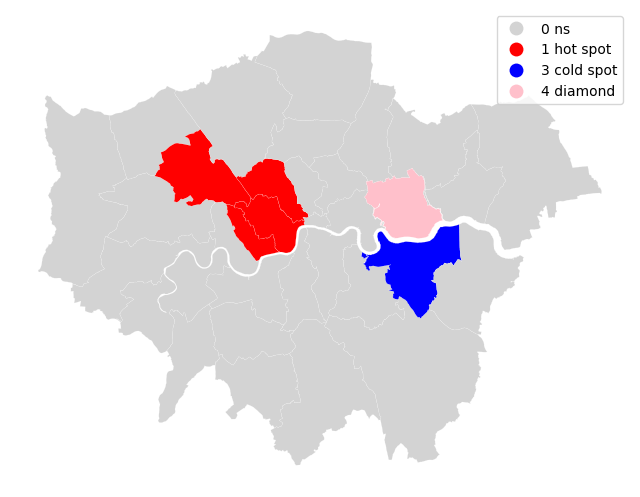

In [22]:
from matplotlib import colors
hmap = colors.ListedColormap(['lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(8, 8))
merge.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [23]:
boros = gpd.read_file('https://github.com/xiaohansu59/Airbnb/blob/main/data/boroughs.gpkg?raw=true')

In [24]:
sub_cols=['id','latitude','longitude','room_type','last_review']
df=df[sub_cols]
df.head()

,id,latitude,longitude,room_type,last_review
0,106332,51.52874,-0.05396,Private room,2016-06-10
1,13913,51.56861,-0.11270,Private room,2022-07-15
2,284532,51.52851,-0.07426,Entire home/apt,2022-01-04
3,107048,51.52478,-0.10484,Private room,2022-09-02
4,284603,51.51464,-0.20004,Entire home/apt,2022-07-04


In [25]:
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df.longitude, df.latitude, 
                       crs= 'epsg:4326'))

gdf = gdf.to_crs('epsg:27700')

In [26]:
active_gdf = gdf.drop(gdf[gdf.last_review.isna()].index.values, axis=0)
active_gdf = active_gdf.loc[active_gdf["last_review"] >= '2021-09-10']

In [27]:
print(f"There are {active_gdf.shape[0]} active listings and {gdf.shape[0]} total listings.")
print(f"The active listings are {active_gdf.shape[0] *100 / gdf.shape[0]:,.2f}% of the total listings.")

There are 31336 active listings and 69351 total listings.
The active listings are 45.18% of the total listings.


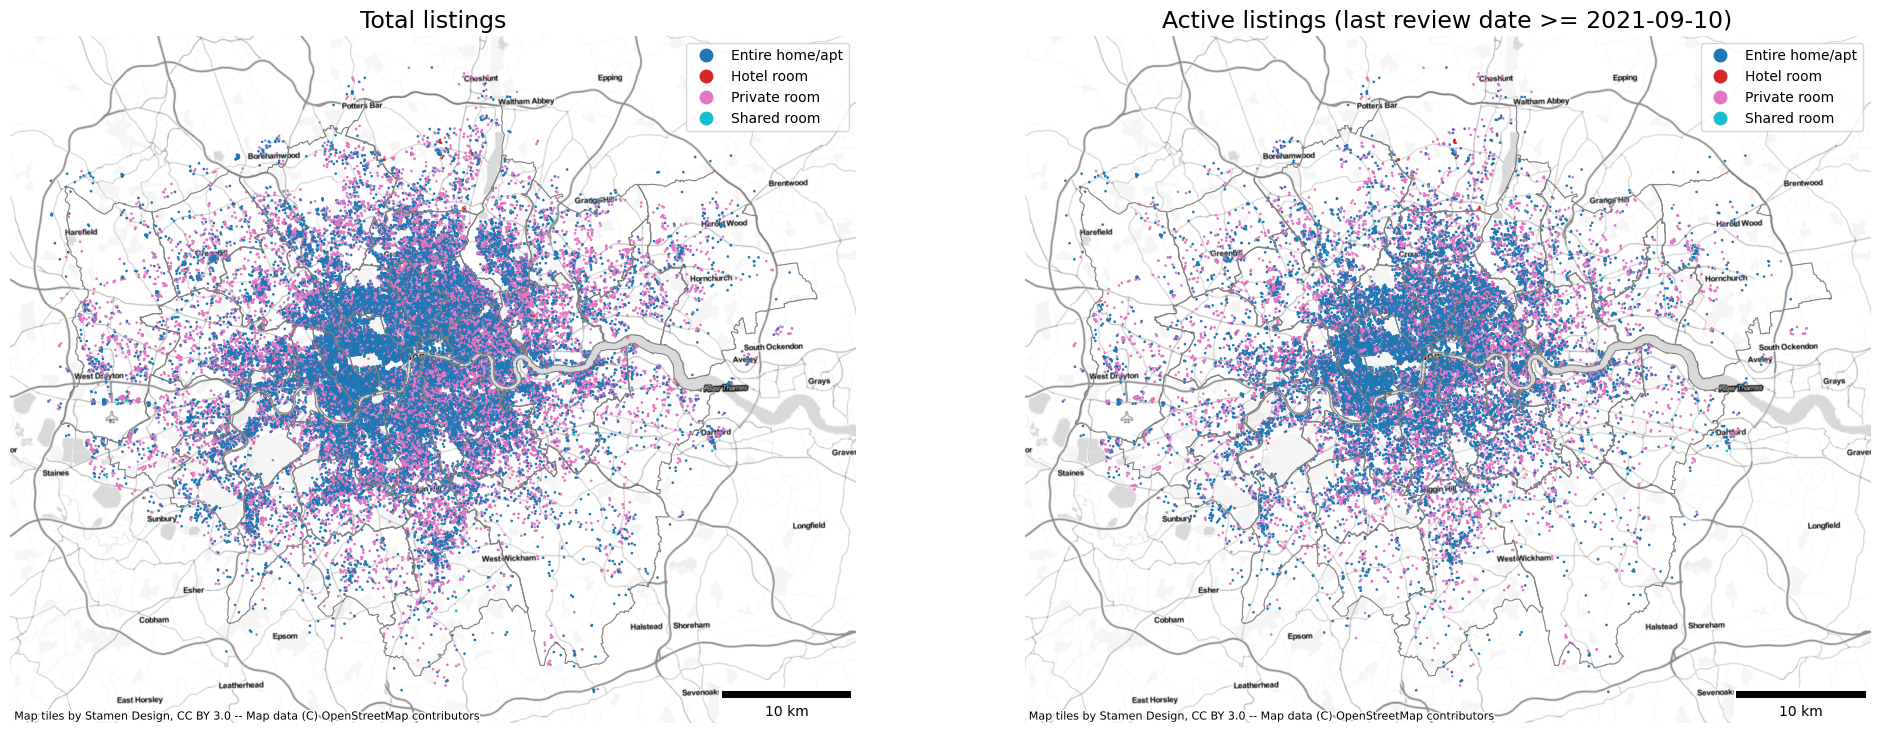

In [28]:
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx

#create a base axis for the plot
fig, axes = plt.subplots(1,2, figsize = (24,16))

plt1 = "Total listings"
plt2 = "Active listings (last review date >= 2021-09-10)"


# set scalebar position and layout
scale1 = ScaleBar(dx=1,
    location='lower right', 
    label_loc='left', scale_loc='bottom')
scale2 = ScaleBar(dx=1,
    location='lower right', 
    label_loc='left', scale_loc='bottom')


#plot 1

#plot the London outline 
boros.boundary.plot(ax=axes[0], edgecolor = "grey", linewidth=0.8)

#plot the Airbnb listings
gdf.plot(ax = axes[0], cmap= "tab10", column="room_type", markersize = 0.8, legend=True)

#add basemap
ctx.add_basemap(ax= axes[0], crs= boros.crs,
               source = ctx.providers.Stamen.TonerLite)

#add scalebar 
axes[0].add_artist(scale1)


#plot 2

#plot the London outline 
boros.boundary.plot(ax=axes[1], edgecolor = "grey", linewidth=0.8)

#plot the active Airbnb listings
active_gdf.plot(ax = axes[1], cmap= "tab10", column="room_type", markersize = 0.8, legend=True)

#add basemap
ctx.add_basemap(ax= axes[1], crs= boros.crs,
               source = ctx.providers.Stamen.TonerLite)

#add scalebar
axes[1].add_artist(scale2)

#set the axis off
for ax in axes:
    ax.axis('off')

#add titles 
axes[0].set_title(plt1.capitalize(), size=17);
axes[1].set_title(plt2.capitalize(), size=17);